In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    error = y - np.dot(tx, w)
    return np.dot(error.T, error)/len(error)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [8]:
from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j] = compute_loss_mse(y, tx, np.array([grid_w0[i], grid_w1[j]]).T)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609525, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.978 seconds


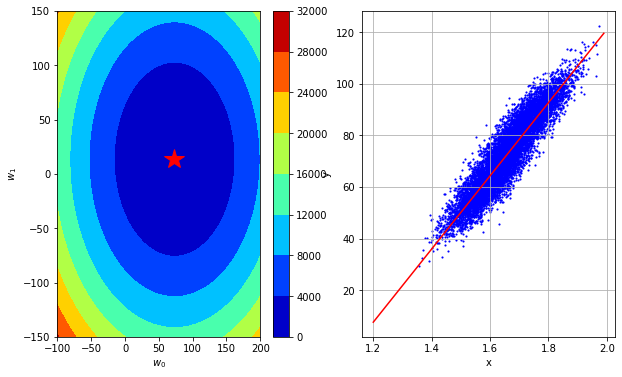

In [10]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [11]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    error = y - np.dot(tx, w)
    return -np.dot(tx.T, error)/len(y)

Please fill in the functions `gradient_descent` below:

In [12]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_gradient(y, tx, w)
        
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [13]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5584.473425518336, w0=51.3057454014736, w1=9.435798704492266
GD iter. 1/49: loss=530.6049242179216, w0=66.69746902191571, w1=12.266538315839991
GD iter. 2/49: loss=75.75675910088255, w0=71.31498610804834, w1=13.115760199244328
GD iter. 3/49: loss=34.820424240348956, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=31.136154102900914, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=30.80456979053059, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=30.77472720241726, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=30.772041369487056, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=30.77179964452334, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=30.771777889276603, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=30.7717759313044, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=30.771775755086903, w0=73.29388305071, w1=13.479705271317192
GD ite

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [15]:
import random

def compute_stoch_gradient(y, tx, w, n = random.randint(1, len(y))):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    for i,j in batch_iter(y, tx, n):
        y = i
        tx = j
     
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_stoch_gradient(y, tx, w, batch_size)

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [16]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=5584.473425518336, w0=4.415780187511653, w1=-6.8248722198156875
SGD iter. 1/49: loss=5187.246353573045, w0=8.231032673049352, w1=-11.83907409971299
SGD iter. 2/49: loss=4904.99229517243, w0=14.11656165560694, w1=-12.583440378411577
SGD iter. 3/49: loss=4212.01968789163, w0=20.514119278021262, w1=-10.185431550754304
SGD iter. 4/49: loss=3376.5183911968375, w0=29.310909441771642, w1=1.8160199150737828
SGD iter. 5/49: loss=2101.3188928192435, w0=32.0762984577965, w1=0.3128225089162828
SGD iter. 6/49: loss=1903.0312567033238, w0=35.98479447817287, w1=0.3682468054888608
SGD iter. 7/49: loss=1594.6533032882664, w0=38.564137558377226, w1=-2.8874465291264126
SGD iter. 8/49: loss=1504.8135958020916, w0=41.23838279744327, w1=-5.309163933037414
SGD iter. 9/49: loss=1411.3512446122584, w0=40.36762082644168, w1=-3.2360818116792744
SGD iter. 10/49: loss=1394.3308621451076, w0=43.72512813344013, w1=-3.12065818629251
SGD iter. 11/49: loss=1180.6576513491702, w0=48.350877851050235,

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [18]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
y.shape, tx.shape

((202,), (202, 2))

In [20]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=5739.670229071707, w0=68.55235655491501, w1=99.15004846754914
SGD iter. 1/49: loss=7926.561935412722, w0=130.8028257987606, w1=33.86581834549257
SGD iter. 2/49: loss=3871.975015159421, w0=103.5693839045139, w1=48.73239805482594
SGD iter. 3/49: loss=2423.306314293478, w0=44.79749884083386, w1=-30.770199963053237
SGD iter. 4/49: loss=2736.278286569666, w0=80.2901138107718, w1=-20.063376317769915
SGD iter. 5/49: loss=1137.6810471212004, w0=89.2060597334921, w1=-16.68189298577732
SGD iter. 6/49: loss=1129.2485195169431, w0=104.24395153806037, w1=-0.9573153258592999
SGD iter. 7/49: loss=1186.2743337804056, w0=76.1212336949691, w1=21.304108812521747
SGD iter. 8/49: loss=241.53478117913002, w0=78.10148992768025, w1=19.085563458813265
SGD iter. 9/49: loss=212.94533219548057, w0=70.57711751966482, w1=12.587385320172562
SGD iter. 10/49: loss=146.4565918694685, w0=74.18187391447219, w1=12.420387215705922
SGD iter. 11/49: loss=133.79406077853912, w0=70.91870587486456, w1=14.05

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [22]:
def compute_loss_mae(y, tx, w):

    """Calculate the loss using MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    error = y - np.dot(tx, w)
    return np.sum(np.abs(error))/len(error)

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    error = y - np.dot(tx, w)
    return -np.dot(tx.T, np.sign(error))/len(error)
    

In [23]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_subgradient_mae(y, tx, w)
        
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=5739.670229071707, w0=0.7, w1=8.756471895211877e-16
SubGD iter. 1/499: loss=5636.465300874807, w0=1.4, w1=1.7512943790423754e-15
SubGD iter. 2/499: loss=5534.240372677911, w0=2.0999999999999996, w1=2.626941568563563e-15
SubGD iter. 3/499: loss=5432.995444481015, w0=2.8, w1=3.502588758084751e-15
SubGD iter. 4/499: loss=5332.730516284118, w0=3.5, w1=4.378235947605939e-15
SubGD iter. 5/499: loss=5233.445588087222, w0=4.2, w1=5.253883137127127e-15
SubGD iter. 6/499: loss=5135.140659890325, w0=4.9, w1=6.1295303266483146e-15
SubGD iter. 7/499: loss=5037.815731693427, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubGD iter. 8/499: loss=4941.470803496531, w0=6.300000000000001, w1=7.88082470569069e-15
SubGD iter. 9/499: loss=4846.105875299633, w0=7.000000000000001, w1=8.756471895211878e-15
SubGD iter. 10/499: loss=4751.720947102735, w0=7.700000000000001, w1=9.632119084733065e-15
SubGD iter. 11/499: loss=4658.316018905839, w0=8.4, w1=1.0507766274254253e-14
SubGD iter.

In [25]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [26]:
def compute_stoch_subgradient_mae(y, tx, w, n = random.randint(1, len(y))):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    for i,j in batch_iter(y, tx, n):
        y = i
        tx = j
     
    return compute_subgradient_mae(y, tx, w)

In [27]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_stoch_subgradient_mae(y, tx, w)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [28]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=0.13802489287431957
SubSGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=0.1585577415355719
SubSGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=0.15453902354043467
SubSGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=0.13267357942763422
SubSGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=0.33844217800399296
SubSGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=0.2661186347074165
SubSGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=0.3679274470378272
SubSGD iter. 7/499: loss=69.16780585492637, w0=5.6000000000000005, w1=0.4593271988599945
SubSGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=0.3920089716040031
SubSGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=0.2846477995306054
SubSGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=0.27762623054396496
SubSGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=0.04674609371963645
SubSGD iter. 12/499: loss=65.667

In [29]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>